In [5]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy  as np

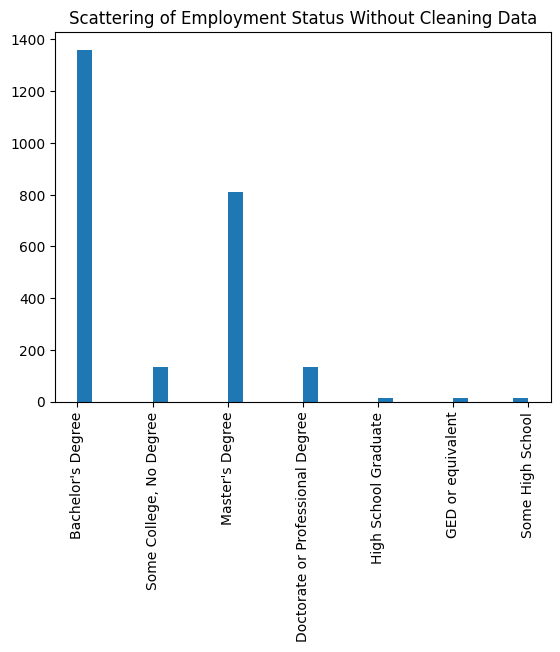

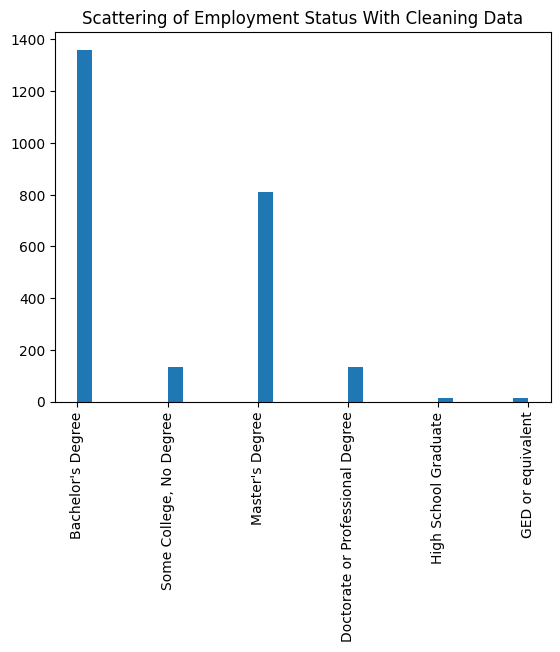

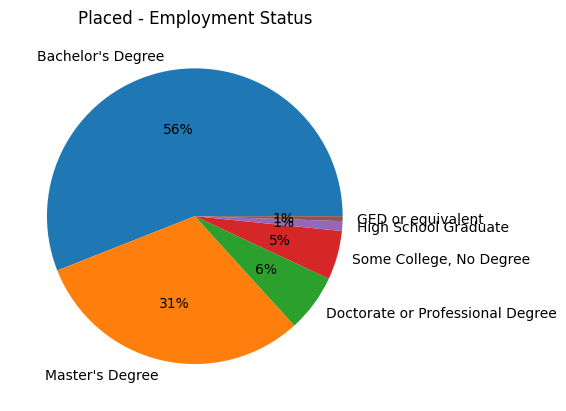

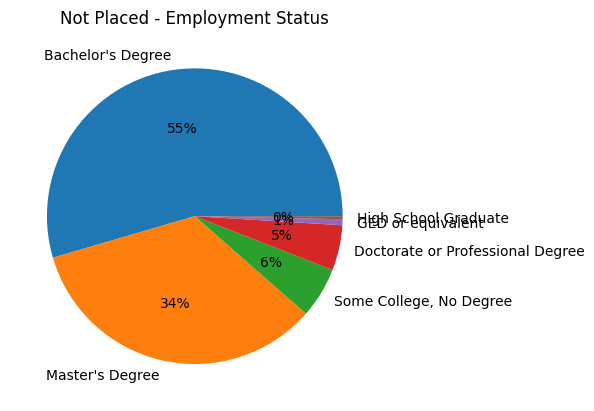

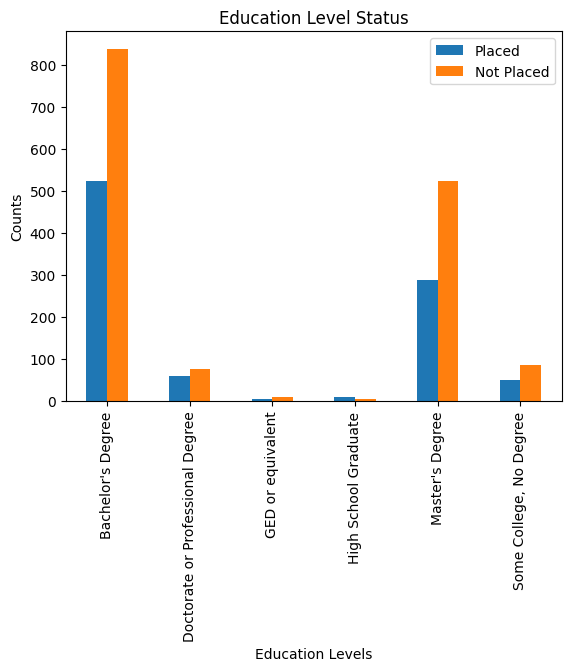

In [8]:
dataFrame = loadData()

#Prepare Data
#Cleaning Data

dataFrame = dataFrame.dropna(subset=["highest_level_of_education"])
plt.title('Scattering of Employment Status Without Cleaning Data')
plt.hist(dataFrame["highest_level_of_education"],bins=30)
plt.xticks(rotation=90)
plt.show()

dataFrame["highest_level_of_education"] = dataFrame["highest_level_of_education"].replace("Some High School", np.nan)
dataFrame = dataFrame.dropna(subset=["highest_level_of_education"])
plt.title('Scattering of Employment Status With Cleaning Data')
plt.hist(dataFrame["highest_level_of_education"],bins=30)
plt.xticks(rotation=90)
plt.show() 

#End Prepare Data
#End Cleaning Data

targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

educationLevelPlaced = dataPlaced["highest_level_of_education"]
educationLevelNotPlaced = dataNotPlaced["highest_level_of_education"]

educationLevelPlaced = educationLevelPlaced.dropna().value_counts()
educationLevelNotPlaced = educationLevelNotPlaced.dropna().value_counts()



educationLevelPlaced.plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Placed - Employment Status')
plt.xticks(rotation=90)
plt.show()


educationLevelNotPlaced.plot(kind='pie', autopct='%1.0f%%')
plt.title('Not Placed - Employment Status')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()


combinedDataFrame = pd.DataFrame({
    'Placed': educationLevelPlaced,
    'Not Placed': educationLevelNotPlaced
})

combinedDataFrame.plot(kind='bar')

plt.xlabel('Education Levels')
plt.ylabel('Counts')
plt.title('Education Level Status')
plt.show()

